# Comprehensive Forecasting System with User Interface for Multiple Sectors

- i200844 Miral Fatima
- i202656 Muneeba Aftab
- Section: DS-N

### DATASET # 1 (Finance Sector: Monthly stock prices from the S&P 500 index)

In [25]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 326.8 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/614.7 kB 585.1 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/614.7 kB 654.9 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/614.7 kB 748.1 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/614.7 kB 734.2 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/614.7 kB 811.5 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/614.7 kB 811.5 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/614.7 kB 811.5 kB/s eta 0:00:01
   ---------------------- --------------- 368.6/614.7 kB 849.3 kB/s

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

In [53]:
# Load the dataset
dataset1 = pd.read_csv("sp500_index.csv", index_col='Date', parse_dates=True)

dataset1 = dataset1.dropna()

# print shape of data
print('Shape of data: ', dataset1.shape)

# Display the first few rows of the dataframe
dataset1.head()


Shape of data:  (2518, 1)


,S&P500
Date,
2014-05-12,1896.65
2014-05-13,1897.45
2014-05-14,1888.53
2014-05-15,1870.85
2014-05-16,1877.86


<Axes: xlabel='Date'>

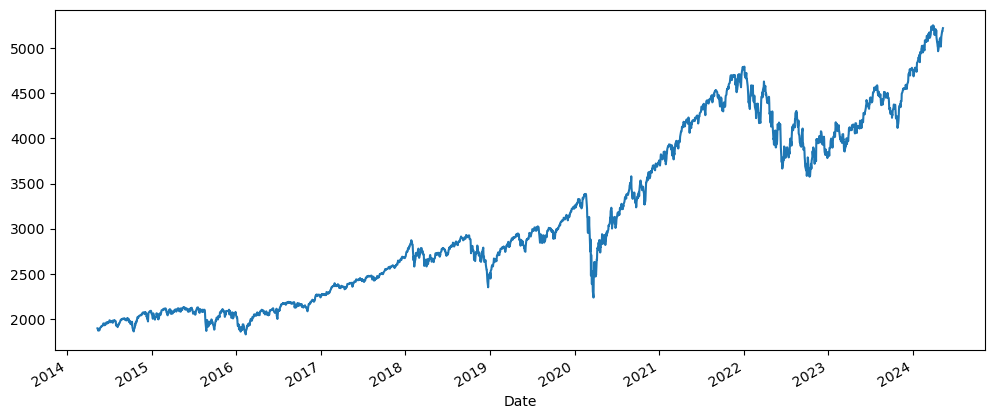

In [54]:
dataset1['S&P500'].plot(figsize=(12,5))

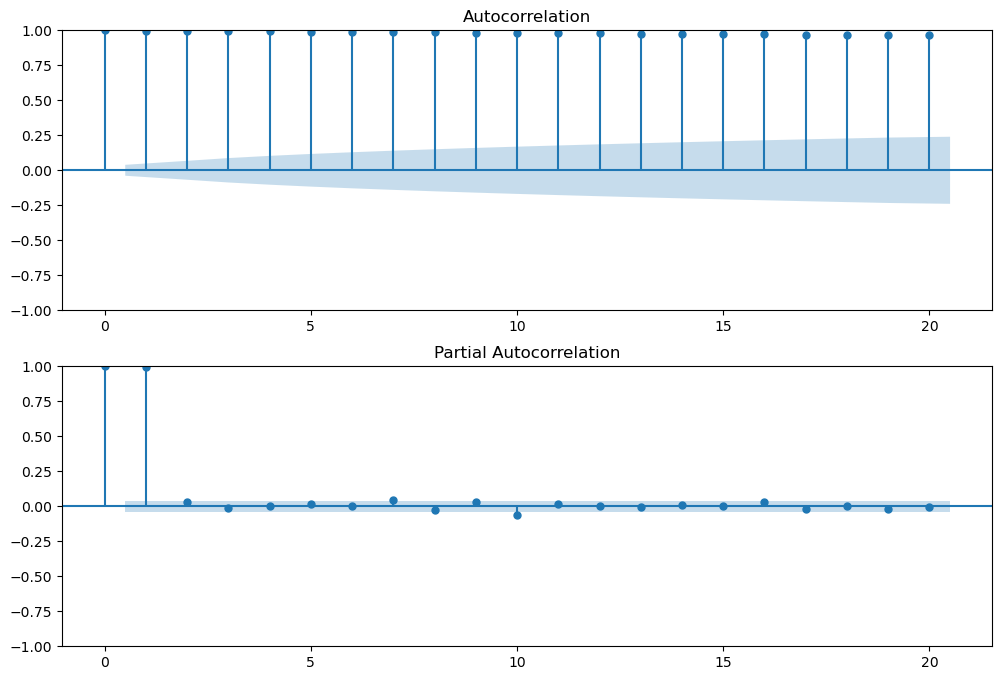

In [67]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(dataset1['S&P500'], lags=20, ax=ax1)
plot_pacf(dataset1['S&P500'], lags=20, ax=ax2)
plt.show()

**Checking for Stationary**
- If p < 0.05  ; Data is stationary- If p > 0.05  ; Data is not stationary

In [135]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

# Step 1: Cleaning
# Assuming dataset1 is your DataFrame containing the S&P500 data
# You can fill missing values with the mean of the column
dataset1_cleaned = dataset1.fillna(dataset1.mean())

# Step 2: Normalization/Standardization
scaler = MinMaxScaler()
dataset1_scaled = pd.DataFrame(scaler.fit_transform(dataset1_cleaned), columns=dataset1_cleaned.columns)

# Step 3: Stationarization
dataset1_stationary = dataset1_scaled.diff().dropna()

# Now, let's check if the data is stationary after preprocessing
def adf_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("ADF Statistic:", dftest[0])
    print("p-value:", dftest[1])
    print("Critical Values:")
    for key, val in dftest[4].items():
        print("\t{}: {}".format(key, val))

print("After Preprocessing:\n")
adf_test(dataset1_stationary['S&P500'])

# Update the original dataset with preprocessed data
dataset1.update(dataset1_stationary)

# Save the updated dataset to a new CSV file
dataset1.to_csv("Preprocessed_S&P500_data.csv", index=False)

# Print the shape of the updated dataset
print('Shape of updated dataset:', dataset1.shape)

# Display the first few rows of the updated dataset
dataset1.head()


After Preprocessing:

ADF Statistic: -15.515107621641222
p-value: 2.321725019689373e-28
Critical Values:
	1%: -3.4329610922579095
	5%: -2.8626935681060375
	10%: -2.567384088736619
Shape of updated dataset: (2518, 1)


,S&P500
Date,
2014-05-12,1896.65
2014-05-13,1897.45
2014-05-14,1888.53
2014-05-15,1870.85
2014-05-16,1877.86


**Figure out order for ARIMA Model**

In [136]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(dataset1['S&P500'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25032.838, Time=3.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25129.219, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25110.503, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25111.977, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25130.686, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25111.034, Time=1.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25111.210, Time=0.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25034.459, Time=3.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25104.129, Time=4.69 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25109.858, Time=0.87 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25111.034, Time=2.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25111.689, Time=1.94 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25035.231, Time=4.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=25034.767, Time=1.01 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -12510.419
Date:                Tue, 14 May 2024   AIC                          25032.838
Time:                        14:16:48   BIC                          25067.823
Sample:                             0   HQIC                         25045.535
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.8276      2.514      1.920      0.055      -0.100       9.755
ar.L1         -1.7642      0.018    -99.594      0.000      -1.799      -1.730
ar.L2         -0.8872      0.017    -53.272      0.000      -0.920      -0.855
ma.L1          1.6987      0.022     76.279      0.000       1.655       1.742
ma.L2          0.8017      0.021     37.855      0.000       0.760       0.843
sigma2      1215.3417     18.513     65.647      0.000    1179.056    1251.627
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              4439.13
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               7.63   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
print(dataset1.shape)
train=dataset1.iloc[:-30]
test=dataset1.iloc[-30:]
print(train.shape,test.shape)

(2518, 1)
(2488, 1) (30, 1)


In [138]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train['S&P500'], order=(2, 1, 2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 S&P500   No. Observations:                 2488
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -12355.733
Date:                Tue, 14 May 2024   AIC                          24721.466
Time:                        14:17:00   BIC                          24750.560
Sample:                             0   HQIC                         24732.032
                               - 2488                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7649      0.017   -101.613      0.000      -1.799      -1.731
ar.L2         -0.8880      0.016    -54.560      0.000      -0.920      -0.856
ma.L1          1.6996      0.022     77.508      0.0

**Make Predictions on Test Set**

In [139]:
# Make predictions
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.index = dataset1.index[start:end+1]

# Print predictions
print(pred)


Date
2024-04-01    5257.540519
2024-04-02    5256.762864
2024-04-03    5255.302159
2024-04-04    5258.570671
2024-04-05    5254.099265
2024-04-08    5259.088299
2024-04-09    5254.253882
2024-04-10    5258.355769
2024-04-11    5255.409405
2024-04-12    5256.966902
2024-04-15    5256.834477
2024-04-16    5255.685140
2024-04-17    5257.831166
2024-04-18    5255.064311
2024-04-19    5258.041794
2024-04-22    5255.243873
2024-04-23    5257.537853
2024-04-24    5255.973814
2024-04-25    5256.697099
2024-04-26    5256.809453
2024-04-29    5255.968888
2024-04-30    5257.352608
2024-05-01    5255.656938
2024-05-02    5257.420841
2024-05-03    5255.813525
2024-05-06    5257.083893
2024-05-07    5256.269146
2024-05-08    5256.578990
2024-05-09    5256.755647
2024-05-10    5256.168729
Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='Date'>

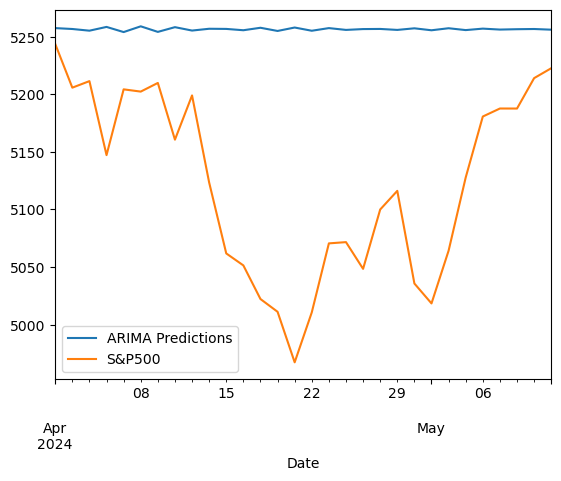

In [140]:
# Plotting Predictions

pred.plot(legend=True)
test['S&P500'].plot(legend=True)

In [141]:
test['S&P500'].mean()

5122.603

**Checking Accuracy Metric**

In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test['S&P500']))
print(rmse)

155.81820103454504


In [143]:
# Entire dataset

model2=ARIMA(dataset1['S&P500'],order=(2,1,2))
model2=model.fit()
dataset1.tail()

,S&P500
Date,
2024-05-06,5180.74
2024-05-07,5187.70
2024-05-08,5187.67
2024-05-09,5214.08
2024-05-10,5222.68


**For Future Dates**

In [144]:
import pandas as pd

# Define the range of future dates
index_future_dates = pd.date_range(start='2024-05-10', end='2024-06-09')

# Make predictions
pred = model2.predict(start=len(dataset1), end=len(dataset1)+30, typ='levels').rename('ARIMA Predictions')

pred.index=index_future_dates

# Print predictions
print(pred)


# index_future_dates = date_range(start='2024-05-10' ,end='2024-06-09')
#print(index_future_dates)
#pred = model2.predict(start=len(dataset1), end=len(dataset1)+30, typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
#pred.index=index_future_dates
#print(pred)

2024-05-10    5257.047693
2024-05-11    5256.017615
2024-05-12    5257.055055
2024-05-13    5256.138811
2024-05-14    5256.834622
2024-05-15    5256.420225
2024-05-16    5256.533705
2024-05-17    5256.701410
2024-05-18    5256.304663
2024-05-19    5256.855950
2024-05-20    5256.235309
2024-05-21    5256.841120
2024-05-22    5256.323067
2024-05-23    5256.699407
2024-05-24    5256.495244
2024-05-25    5256.521377
2024-05-26    5256.656552
2024-05-27    5256.394780
2024-05-28    5256.736739
2024-05-29    5256.365677
2024-05-30    5256.716895
2024-05-31    5256.426541
2024-06-01    5256.627099
2024-06-02    5256.530974
2024-06-03    5256.522528
2024-06-04    5256.622792
2024-06-05    5256.453339
2024-06-06    5256.663369
2024-06-07    5256.443167
2024-06-08    5256.645289
2024-06-09    5256.484107
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

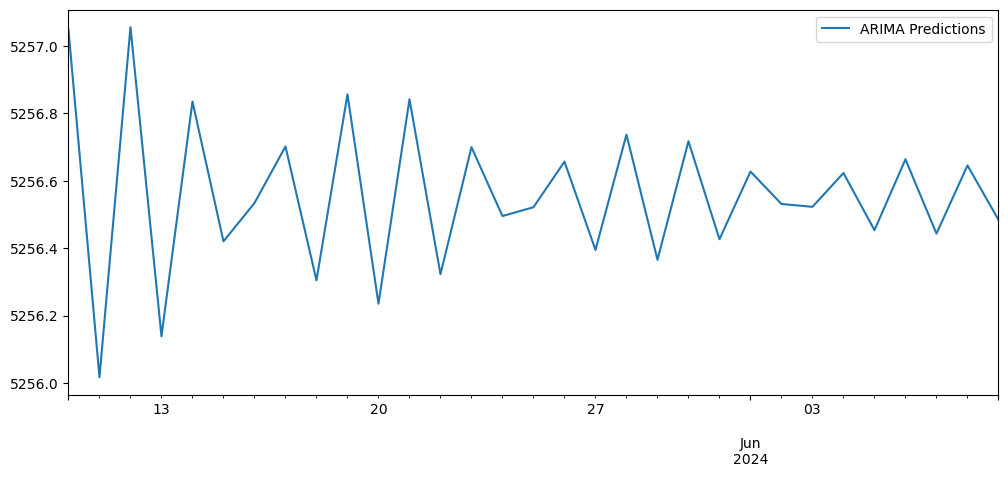

In [145]:
pred.plot(figsize=(12,5), legend=True)

In [ ]:
**ANN Design and Training:**

In [ ]:
**SARIMA (Seasonal ARIMA):**

In [ ]:
**Exponential Smoothing (ETS):**

In [ ]:
**Prophet:**

In [ ]:
**Support Vector Regression (SVR):
**

### DATASET # 2 (Energy Sector: Hourly energy consumption data)

In [79]:
# Load the dataset
dataset2 = pd.read_csv("AEP_hourly.csv", index_col='Datetime', parse_dates=True)

dataset2 = dataset2.dropna()

# print shape of data
print('Shape of data: ', dataset2.shape)

# Display the first few rows of the dataframe
dataset2.head()

Shape of data:  (121273, 1)


,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


<Axes: xlabel='Datetime'>

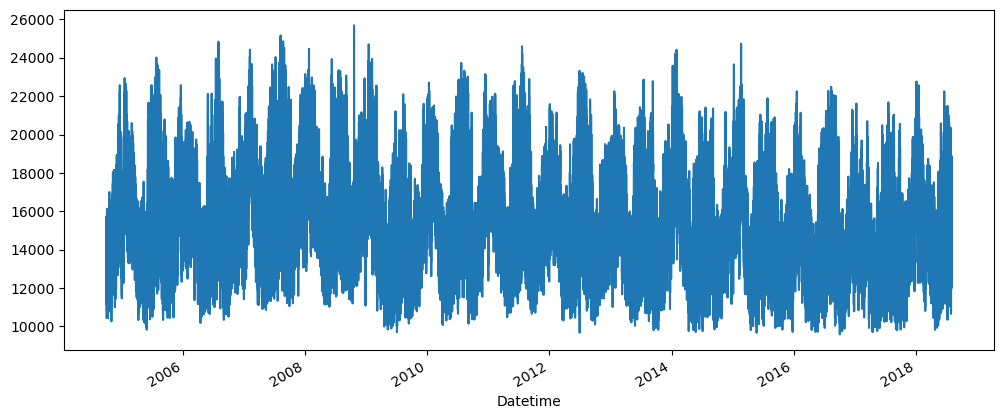

In [80]:
dataset2['AEP_MW'].plot(figsize=(12,5))

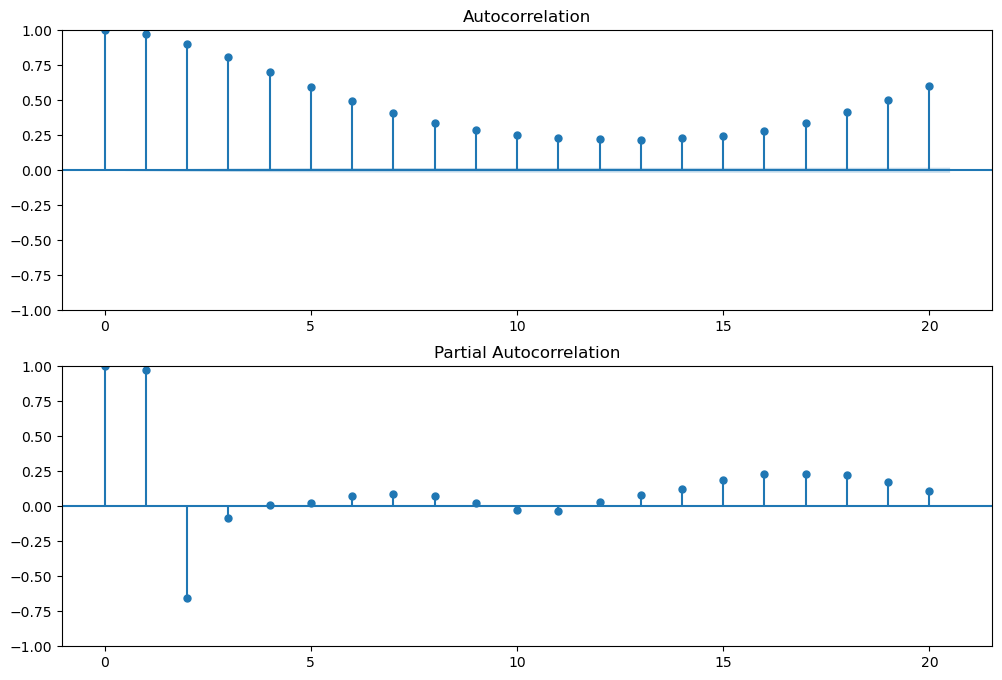

In [82]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(dataset2['AEP_MW'], lags=20, ax=ax1)
plot_pacf(dataset2['AEP_MW'], lags=20, ax=ax2)
plt.show()

In [83]:
import pandas as pd
import numpy as np

# Step 1: Cleaning
# Assuming dataset1 is your DataFrame containing the S&P500 data
# You can fill missing values with the mean of the column
dataset2_cleaned = dataset2.fillna(dataset2.mean())

# Step 2: Normalization/Standardization
# Assuming you want to use MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset2_scaled = pd.DataFrame(scaler.fit_transform(dataset2_cleaned), columns=dataset2_cleaned.columns)

# Step 3: Stationarization
# Assuming you want to apply differencing
dataset2_stationary = dataset2_scaled.diff().dropna()

# Now, let's check if the data is stationary after preprocessing
# Perform the ADF test again
def adf_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("ADF Statistic:", dftest[0])
    print("p-value:", dftest[1])
    print("Critical Values:")
    for key, val in dftest[4].items():
        print("\t{}: {}".format(key, val))

print("After Preprocessing:\n")
adf_test(dataset2_stationary['AEP_MW'])


After Preprocessing:

ADF Statistic: -45.051523167902644
p-value: 0.0
Critical Values:
	1%: -3.430403955763232
	5%: -2.861563847647993
	10%: -2.566782693260533


In [87]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(dataset2['AEP_MW'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1831490.251, Time=118.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1909721.058, Time=2.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1848152.435, Time=7.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1866928.182, Time=26.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1909719.059, Time=1.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1847599.731, Time=20.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1847787.005, Time=88.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1834499.041, Time=146.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1829745.903, Time=214.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1847391.305, Time=42.90 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1826446.158, Time=196.26 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1825871.634, Time=209.02 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1832525.193, Time=170.34 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=18

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               121273
Model:               SARIMAX(5, 1, 3)   Log Likelihood             -912898.634
Date:                Tue, 14 May 2024   AIC                        1825815.268
Time:                        13:18:22   BIC                        1825902.620
Sample:                             0   HQIC                       1825841.549
                             - 121273                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4107      0.008    172.993      0.000       1.395       1.427
ar.L2          0.4152      0.019     22.342      0.000       0.379       0.452
ar.L3         -1.3275      0.013    -99.835      0.000      -1.354      -1.301
ar.L4          0.4316      0.004    119.495      0.000       0.425       0.439
ar.L5          0.0101      0.003      2.946      0.003       0.003       0.017
ma.L1         -0.9668      0.008   -118.813      0.000      -0.983      -0.951
ma.L2         -0.8721      0.015    -56.583      0.000      -0.902      -0.842
ma.L3          0.8729      0.008    110.777      0.000       0.857       0.888
sigma2      2.265e+05    390.371    580.341      0.000    2.26e+05    2.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2398484.44
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
print(dataset2.shape)
train=dataset2.iloc[:-30]
test=dataset2.iloc[-30:]
print(train.shape,test.shape)


(121273, 1)
(121243, 1) (30, 1)


In [110]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train['AEP_MW'], order=(5, 1, 3))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:               121243
Model:                 ARIMA(5, 1, 3)   Log Likelihood             -912673.542
Date:                Tue, 14 May 2024   AIC                        1825365.084
Time:                        13:31:31   BIC                        1825452.434
Sample:                             0   HQIC                       1825391.365
                             - 121243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4100      0.008    181.159      0.000       1.395       1.425
ar.L2          0.4127      0.018     23.367      0.000       0.378       0.447
ar.L3         -1.3236      0.013   -104.821      0.0

In [111]:
# Make predictions
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.index = dataset2.index[start:end+1]

# Print predictions
print(pred)

Datetime
2018-01-02 19:00:00    21437.373682
2018-01-02 20:00:00    21574.119124
2018-01-02 21:00:00    21512.320593
2018-01-02 22:00:00    21333.666860
2018-01-02 23:00:00    21111.667961
2018-01-03 00:00:00    20869.812483
2018-01-01 01:00:00    20647.873431
2018-01-01 02:00:00    20451.110362
2018-01-01 03:00:00    20304.709378
2018-01-01 04:00:00    20204.428914
2018-01-01 05:00:00    20165.122349
2018-01-01 06:00:00    20175.219162
2018-01-01 07:00:00    20241.096758
2018-01-01 08:00:00    20345.661497
2018-01-01 09:00:00    20489.159575
2018-01-01 10:00:00    20651.540480
2018-01-01 11:00:00    20829.935528
2018-01-01 12:00:00    21004.342010
2018-01-01 13:00:00    21171.890268
2018-01-01 14:00:00    21315.392686
2018-01-01 15:00:00    21434.514279
2018-01-01 16:00:00    21516.802210
2018-01-01 17:00:00    21565.917711
2018-01-01 18:00:00    21574.861328
2018-01-01 19:00:00    21551.484846
2018-01-01 20:00:00    21493.728558
2018-01-01 21:00:00    21412.686873
2018-01-01 22:00:00

<Axes: xlabel='Datetime'>

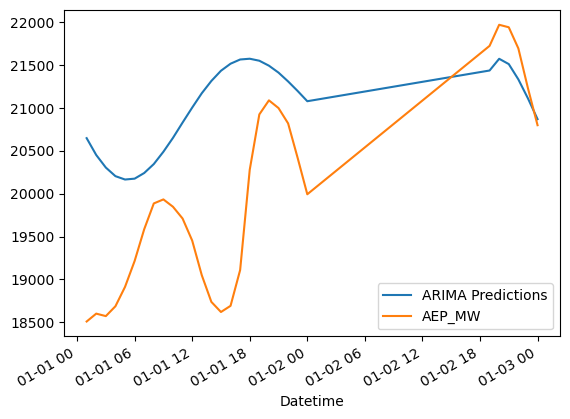

In [112]:
# Plotting Predictions

pred.plot(legend=True)
test['AEP_MW'].plot(legend=True)

In [114]:
test['AEP_MW'].mean()

19966.4

In [115]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test['AEP_MW']))
print(rmse)

1404.596557699695


In [117]:
# Entire dataset

model2=ARIMA(dataset2['AEP_MW'],order=(5,1,3))
model2=model.fit()
dataset2.tail()

,AEP_MW
Datetime,
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0
2018-01-01 23:00:00,20415.0
2018-01-02 00:00:00,19993.0


In [121]:
import pandas as pd

# Define the range of future dates
index_future_dates = pd.date_range(start='2018-01-02', end='2018-02-01')

# Make predictions
pred = model2.predict(start=len(dataset2), end=len(dataset2)+30, typ='levels').rename('ARIMA Predictions')

pred.index=index_future_dates

# Print predictions
print(pred)


2018-01-02    20966.116290
2018-01-03    20861.382231
2018-01-04    20774.762269
2018-01-05    20706.545670
2018-01-06    20663.482322
2018-01-07    20643.057793
2018-01-08    20648.483317
2018-01-09    20674.514366
2018-01-10    20721.335131
2018-01-11    20781.751299
2018-01-12    20854.008550
2018-01-13    20930.172375
2018-01-14    21007.894093
2018-01-15    21079.794508
2018-01-16    21144.188304
2018-01-17    21195.312593
2018-01-18    21233.036966
2018-01-19    21253.816201
2018-01-20    21259.440724
2018-01-21    21248.635953
2018-01-22    21224.936932
2018-01-23    21188.895839
2018-01-24    21145.186541
2018-01-25    21095.409482
2018-01-26    21044.541204
2018-01-27    20994.338382
2018-01-28    20949.242068
2018-01-29    20910.380203
2018-01-30    20881.018367
2018-01-31    20861.146226
2018-02-01    20852.540617
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

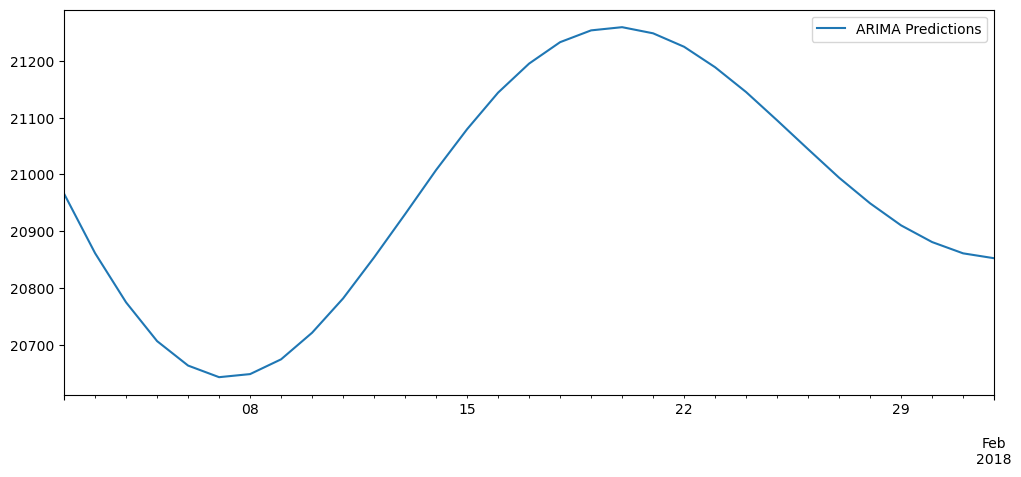

In [122]:
pred.plot(figsize=(12,5), legend=True)

### DATASET # 3 (Environmental Sector: Daily atmospheric CO2 concentrations)

In [2]:
# Load the dataset
dataset3 = pd.read_csv("Daily_atmospheric_CO2_concentration.csv", index_col='day', parse_dates=True)

dataset3 = dataset3.dropna()

# print shape of data
print('Shape of data: ', dataset3.shape)

# Display the first few rows of the dataframe
dataset3.head()


Shape of data:  (3658, 5)


C:\Users\Muneeba\AppData\Local\Temp\ipykernel_3456\3646876038.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset3 = pd.read_csv("Daily_atmospheric_CO2_concentration.csv", index_col='day', parse_dates=True)


,Unnamed: 0,year,month,cycle,trend
day,,,,,
20,0,2013,1,395.64,394.41
21,1,2013,1,395.67,394.42
22,2,2013,1,395.69,394.43
23,3,2013,1,395.72,394.43
24,4,2013,1,395.75,394.44


<Axes: xlabel='day'>

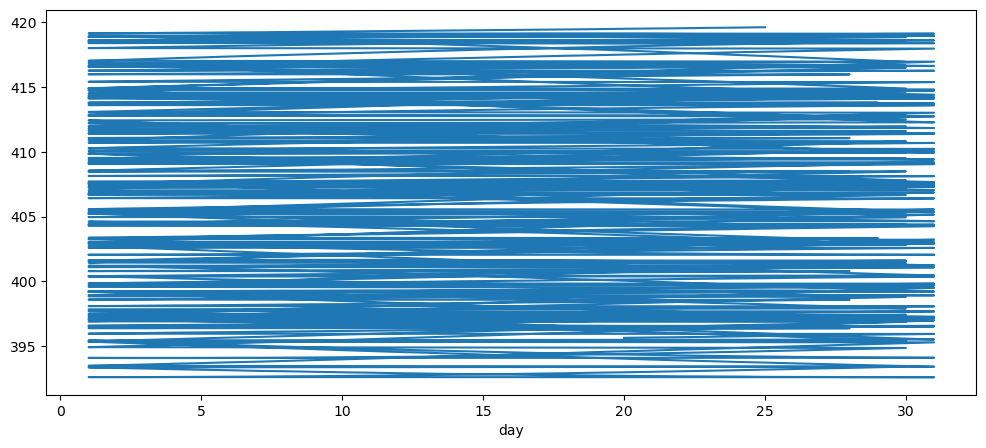

In [3]:
dataset3['cycle'].plot(figsize=(12,5))

<Axes: xlabel='day'>

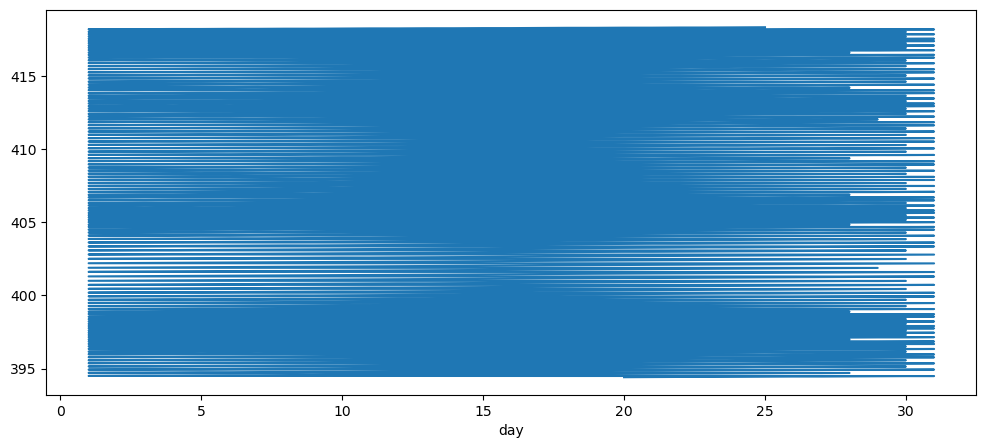

In [4]:
dataset3['trend'].plot(figsize=(12,5))

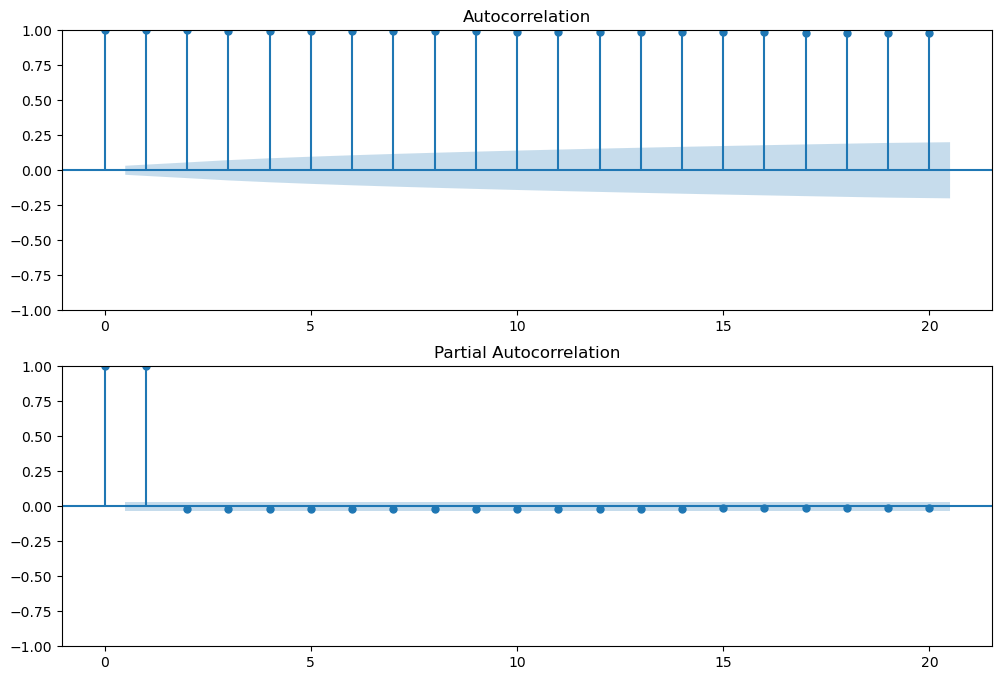

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(dataset3['cycle'], lags=20, ax=ax1)
plot_pacf(dataset3['cycle'], lags=20, ax=ax2)
plt.show()

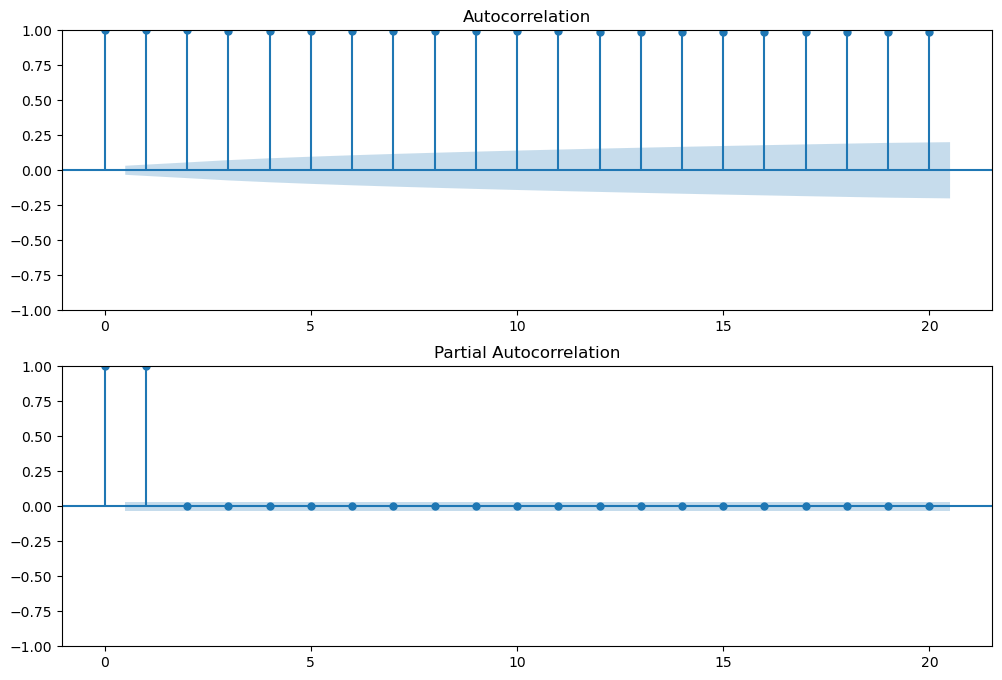

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(dataset3['trend'], lags=20, ax=ax1)
plot_pacf(dataset3['trend'], lags=20, ax=ax2)
plt.show()

In [7]:
import pandas as pd
import numpy as np

# Load the dataset
dataset3 = pd.read_csv("Daily_atmospheric_CO2_concentration.csv", index_col='day', parse_dates=True)

dataset3 = dataset3.dropna()

# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset3[['cycle', 'trend']])  # Selecting columns for scaling
dataset3[['cycle', 'trend']] = scaled_data

# Stationarity check
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Check stationarity of 'cycle' and 'trend' columns
print("Stationarity check for 'cycle' column:")
check_stationarity(dataset3['cycle'])
print("\nStationarity check for 'trend' column:")
check_stationarity(dataset3['trend'])


C:\Users\Muneeba\AppData\Local\Temp\ipykernel_3456\526663532.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset3 = pd.read_csv("Daily_atmospheric_CO2_concentration.csv", index_col='day', parse_dates=True)


Stationarity check for 'cycle' column:
ADF Statistic: -1.43516145899942
p-value: 0.5653080782972858
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567

Stationarity check for 'trend' column:
ADF Statistic: -0.45148484158133184
p-value: 0.9011412968264765
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [8]:
# Apply differencing to 'cycle' column
dataset3['cycle_diff'] = dataset3['cycle'].diff()

# Drop NaN values introduced by differencing
dataset3 = dataset3.dropna()

# Check stationarity of 'cycle_diff' column
print("\nStationarity check for 'cycle_diff' column:")
check_stationarity(dataset3['cycle_diff'])

# Save the preprocessed data to a new CSV file
dataset3.to_csv("Preprocessed_CO2_data.csv")

# Print the shape of the preprocessed data
print('Shape of preprocessed data: ', dataset3.shape)

# Display the first few rows of the preprocessed dataframe
dataset3.head()




Stationarity check for 'cycle_diff' column:
ADF Statistic: -4.307904224986125
p-value: 0.0004304185280521296
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Shape of preprocessed data:  (3657, 6)


,Unnamed: 0,year,month,cycle,trend,cycle_diff
day,,,,,,
21,1,2013,1,0.113662,0.000418,0.001111
22,2,2013,1,0.114402,0.000836,0.000740
23,3,2013,1,0.115513,0.000836,0.001111
24,4,2013,1,0.116623,0.001254,0.001111
25,5,2013,1,0.117734,0.001672,0.001111


In [9]:
# Apply logarithmic transformation to 'trend' column
dataset3['trend_log'] = np.log(dataset3['trend'])

# Check stationarity of 'trend_log' column
print("\nStationarity check for 'trend_log' column:")
check_stationarity(dataset3['trend_log'])

# Save the preprocessed data to a new CSV file
dataset3.to_csv("Preprocessed_CO2_data.csv")

# Print the shape of the preprocessed data
print('Shape of preprocessed data: ', dataset3.shape)

# Display the first few rows of the preprocessed dataframe
dataset3.head()



Stationarity check for 'trend_log' column:
ADF Statistic: -5.480843913416346
p-value: 2.28623101684649e-06
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Shape of preprocessed data:  (3657, 7)


,Unnamed: 0,year,month,cycle,trend,cycle_diff,trend_log
day,,,,,,,
21,1,2013,1,0.113662,0.000418,0.001111,-7.779885
22,2,2013,1,0.114402,0.000836,0.000740,-7.086738
23,3,2013,1,0.115513,0.000836,0.001111,-7.086738
24,4,2013,1,0.116623,0.001254,0.001111,-6.681273
25,5,2013,1,0.117734,0.001672,0.001111,-6.393591


In [10]:
dataset3.head()  # Check the DataFrame after dropping the column

,Unnamed: 0,year,month,cycle,trend,cycle_diff,trend_log
day,,,,,,,
21,1,2013,1,0.113662,0.000418,0.001111,-7.779885
22,2,2013,1,0.114402,0.000836,0.000740,-7.086738
23,3,2013,1,0.115513,0.000836,0.001111,-7.086738
24,4,2013,1,0.116623,0.001254,0.001111,-6.681273
25,5,2013,1,0.117734,0.001672,0.001111,-6.393591


In [11]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(dataset3['cycle_diff'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-52283.667, Time=3.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-36802.211, Time=0.35 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-49869.624, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-38063.623, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-36718.793, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-52140.930, Time=3.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-51652.275, Time=2.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-43263.230, Time=8.62 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-52067.097, Time=1.85 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-48829.880, Time=2.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-51867.892, Time=9.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-51913.294, Time=1.48 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-52409.021, Time=4.14 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-51866.390, Time=4.23 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3657
Model:               SARIMAX(3, 0, 3)   Log Likelihood               26212.511
Date:                Tue, 14 May 2024   AIC                         -52409.021
Time:                        16:53:31   BIC                         -52359.386
Sample:                             0   HQIC                        -52391.347
                               - 3657                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.473e-08   1.57e-06      0.061      0.952   -2.97e-06    3.16e-06
ar.L1          0.7243      0.009     76.371      0.000       0.706       0.743
ar.L2          0.5433      0.011     51.725      0.000       0.523       0.564
ar.L3         -0.2700      0.008    -35.409      0.000      -0.285      -0.255
ma.L1         -0.6300      0.012    -54.016      0.000      -0.653      -0.607
ma.L2         -0.1821      0.012    -15.414      0.000      -0.205      -0.159
ma.L3          0.3421      0.013     26.489      0.000       0.317       0.367
sigma2      3.528e-08   9.51e-10     37.081      0.000    3.34e-08    3.71e-08
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                 7.15
Prob(Q):                              0.31   Prob(JB):                         0.03
Heteroskedasticity (H):               1.09   Skew:                             0.05
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.79e+16. Standard errors may be unstable.
"""

In [12]:
print(dataset3.shape)
train=dataset3.iloc[:-30]
test=dataset3.iloc[-30:]
print(train.shape,test.shape)

(3657, 7)
(3627, 7) (30, 7)


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train['cycle_diff'], order=(3, 0, 3))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             cycle_diff   No. Observations:                 3627
Model:                 ARIMA(3, 0, 3)   Log Likelihood               25996.711
Date:                Tue, 14 May 2024   AIC                         -51977.423
Time:                        16:53:52   BIC                         -51927.854
Sample:                             0   HQIC                        -51959.764
                               - 3627                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.354      0.724      -0.001       0.002
ar.L1          0.7270      0.009     78.140      0.000       0.709       0.745
ar.L2          0.5478      0.010     53.275      0.0

In [14]:
# Make predictions
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.index = dataset3.index[start:end+1]

# Print predictions
print(pred)

day
27    0.000488
28    0.000444
29    0.000412
30    0.000408
31    0.000400
1     0.000401
2     0.000398
3     0.000398
4     0.000397
5     0.000397
6     0.000397
7     0.000396
8     0.000396
9     0.000396
10    0.000395
11    0.000395
12    0.000394
13    0.000394
14    0.000394
15    0.000393
16    0.000393
17    0.000393
18    0.000392
19    0.000392
20    0.000392
21    0.000391
22    0.000391
23    0.000391
24    0.000390
25    0.000390
Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='day'>

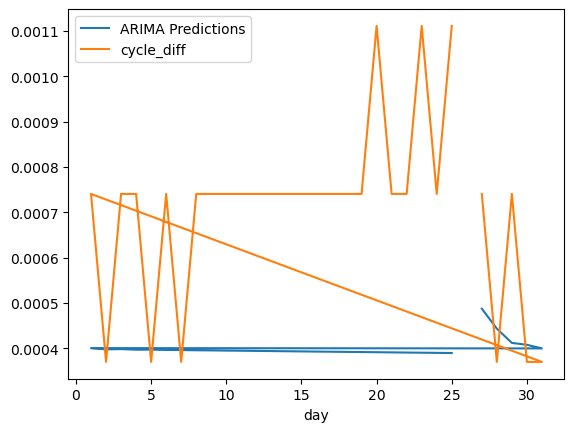

In [15]:
# Plotting Predictions

pred.plot(legend=True)
test['cycle_diff'].plot(legend=True)

In [16]:
test['cycle_diff'].mean()

0.0007034431691965419

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test['cycle_diff']))
print(rmse)

0.0003657465919262408


In [18]:
# Entire dataset

model2=ARIMA(dataset3['cycle_diff'],order=(3,0,3))
model2=model.fit()
dataset3.tail()

,Unnamed: 0,year,month,cycle,trend,cycle_diff,trend_log
day,,,,,,,
21,3653,2023,1,0.996298,0.998746,0.000740,-0.001255
22,3654,2023,1,0.997038,0.999164,0.000740,-0.000836
23,3655,2023,1,0.998149,0.999164,0.001111,-0.000836
24,3656,2023,1,0.998889,0.999582,0.000740,-0.000418
25,3657,2023,1,1.000000,1.000000,0.001111,0.000000


**ANN Model**

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4306 - val_loss: 0.6852
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3863 - val_loss: 0.2237
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1234 - val_loss: 0.1071
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0561 - val_loss: 0.0684
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0412 - val_loss: 0.0508
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0354 - val_loss: 0.0383
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285 - val_loss: 0.0297
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202 - val_loss: 0.0262
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 - val_loss: 0.0203
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - val_loss: 0.0169
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - val_loss: 0.0148
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

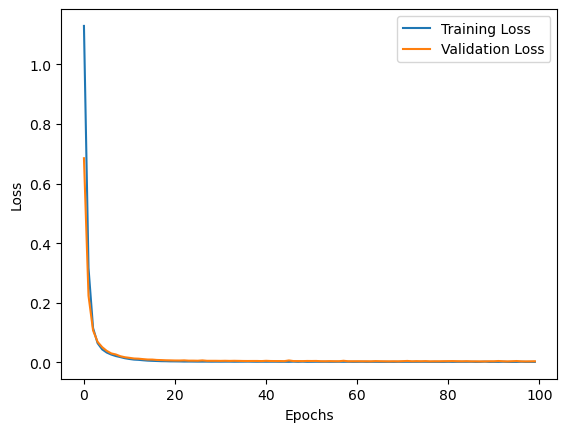

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Step 1: Data Preparation
X = dataset3.drop(['trend_log'], axis=1)  # Input features
y = dataset3['trend_log']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Model Architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Step 3: Model Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Model Training
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))

# Step 5: Model Evaluation
val_loss = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)

# Optionally, you can plot the training and validation loss to see the training progress
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**SARIMA  (Seasonal ARIMA):**

In [22]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
# Let's assume order=(1,1,1) and seasonal_order=(1,1,1,12)
model = SARIMAX(dataset3['cycle_diff'], order=(1,1,1), seasonal_order=(1,1,1,12))

# Fit the SARIMA model
sarima_results = model.fit()

# Print the summary of the model
print(sarima_results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                         cycle_diff   No. Observations:                 3657
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               24343.219
Date:                            Tue, 14 May 2024   AIC                         -48676.438
Time:                                    17:21:39   BIC                         -48645.433
Sample:                                         0   HQIC                        -48665.395
                                           - 3657                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2624      0.027     -9.574      0.000      -0.316      -0.209
ma.L1         -0.8423      0.007   

**Exponential Smoothing (ETS):**

In [25]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the different types of ETS models
# Simple Exponential Smoothing (SES)
ses_model = ExponentialSmoothing(dataset3['cycle'], trend=None, seasonal=None)

# Double Exponential Smoothing (DES)
des_model = ExponentialSmoothing(dataset3['cycle'], trend='add', seasonal=None)

# Triple Exponential Smoothing (TES)
tes_model = ExponentialSmoothing(dataset3['cycle'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the ETS models
ses_results = ses_model.fit()
des_results = des_model.fit()
tes_results = tes_model.fit()

# Print the summary of each model
print("Simple Exponential Smoothing (SES) Model:")
print(ses_results.summary())
print("\nDouble Exponential Smoothing (DES) Model:")
print(des_results.summary())
print("\nTriple Exponential Smoothing (TES) Model:")
print(tes_results.summary())


Simple Exponential Smoothing (SES) Model:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    cycle   No. Observations:                 3657
Model:             ExponentialSmoothing   SSE                              0.009
Optimized:                         True   AIC                         -47095.366
Trend:                             None   BIC                         -47082.957
Seasonal:                          None   AICC                        -47095.355
Seasonal Periods:                  None   Date:                 Tue, 14 May 2024
Box-Cox:                          False   Time:                         17:26:30
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha              

**Prophet**

In [ ]:
import pandas as pd
from fbprophet import Prophet

# Prophet requires the columns to be named 'ds' (timestamp) and 'y' (target variable)
dataset3.rename(columns={'day': 'ds', 'cycle': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(dataset3)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Predicting for additional 365 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


**Support Vector Regression (SVR):**

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Define the input features (X) and target variable (y)
X = dataset3.drop(['cycle_diff'], axis=1)  # Remove the 'cycle_diff' column
y = dataset3['cycle_diff']

# Define the SVR pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svr', SVR()),  # SVR model
])

# Define the hyperparameters grid for SVR
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf'],  # Kernel types
    'svr__C': [0.1, 1, 10],  # Regularization parameter
    'svr__gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Define time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score:", grid_search.best_score_)

Best Parameters: {'svr__C': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Best Negative MSE Score: -2.8508861903379236e-06


**Long Short-Term Memory (LSTM):**

In [36]:
# Define input features (X) and target variable (y)
X = dataset3.drop(columns=['cycle_diff'])  # Assuming 'cycle_diff' is the target variable
y = dataset3['cycle_diff']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Reshape the input data to fit the LSTM model
# Reshape input to be [samples, time steps, features]
n_steps = 3  # Number of time steps (you can adjust this based on your data)
n_features = X.shape[1]  # Number of features

# Determine the number of samples and reshape accordingly
n_samples_train = X_train.shape[0] - n_steps + 1
n_samples_test = X_test.shape[0] - n_steps + 1

X_train_reshaped = np.zeros((n_samples_train, n_steps, n_features))
X_test_reshaped = np.zeros((n_samples_test, n_steps, n_features))

for i in range(n_samples_train):
    X_train_reshaped[i] = X_train[i:i+n_steps]

for i in range(n_samples_test):
    X_test_reshaped[i] = X_test[i:i+n_steps]

# Align y_train and y_test with X_train_reshaped and X_test_reshaped
y_train_aligned = y_train[n_steps-1:]
y_test_aligned = y_test[n_steps-1:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))  # Output layer with one neuron

# Compile the model
model.compile(optimizer='adam', loss='mse')  # You can use other optimizers and loss functions

# Train the model
model.fit(X_train_reshaped, y_train_aligned, epochs=100, verbose=1, validation_data=(X_test_reshaped, y_test_aligned))

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test_aligned)
print("Test MSE:", mse)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.2645e-04 - val_loss: 5.7636e-05
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8054e-06 - val_loss: 2.5037e-05
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5574e-06 - val_loss: 1.8880e-05
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6427e-06 - val_loss: 2.0972e-05
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2919e-06 - val_loss: 1.0380e-05
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0244e-06 - val_loss: 1.0616e-05
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8184e-06 - val_loss: 1.4671e-05
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5746e-06 - val_loss: 1.4921e-05
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4195e-06 - val_loss: 1.0903e-05
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1655e-06 - val_loss: 7.5060e-06
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0517e-0

**Hybrid Models Integration:**

In [38]:
# Define input features (X) and target variable (y)
X = dataset3.drop(columns=['cycle_diff'])  # Features include all columns except 'cycle_diff'
y = dataset3['cycle_diff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train ARIMA model
arima_model = ARIMA(y_train, order=(5,1,0))  # Adjust order as needed
arima_fit = arima_model.fit()

# Forecast using ARIMA model
arima_forecast = arima_fit.forecast(steps=len(X_test))

# Scale the ARIMA forecast
scaler = MinMaxScaler()
arima_forecast_scaled = scaler.fit_transform(np.array(arima_forecast).reshape(-1, 1))

# Concatenate ARIMA forecast with original features
X_train_with_arima = np.concatenate((X_train, np.zeros((len(X_train), 1))), axis=1)  # Placeholder for ARIMA forecast
X_test_with_arima = np.concatenate((X_test, arima_forecast_scaled), axis=1)

# Define and train ANN model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_with_arima.shape[1]))  # Adjust input_dim as needed
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mse')  # Compile the model
model.fit(X_train_with_arima, y_train, epochs=100, verbose=1)  # Train the model

# Predict using ANN model
y_pred_ann = model.predict(X_test_with_arima)

# Evaluate the hybrid model
mse_hybrid = mean_squared_error(y_test, y_pred_ann)
print("Hybrid Model Test MSE:", mse_hybrid)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 108006.0312
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.5173
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.5671
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6060
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7271
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4246
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9702
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8833
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4048
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2028
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9613
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8150
Epoch 13/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7859
Epoch 14/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6390
Epoch 15/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.58